In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [108]:
df= pd.read_csv('movies.csv')

In [109]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [110]:
df.shape

(7668, 15)

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [112]:
null_values = df.isnull().sum()
null_values

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [113]:
#cleaning out values where gross earnings are 0
df1 = df[df['gross'] != 0]

In [114]:
#cleaning out null values
df2 = df1.dropna()

In [115]:
df2.shape

(5421, 15)

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [117]:
for col in df2.columns:
    miss_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,miss_pct))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [118]:
#for more understandable digits
df2['gross'] = df2['gross'].astype('int64')
df2['budget'] = df2['budget'].astype('int64')
df2['runtime'] = df2['runtime'].astype('int64')
df2['votes'] = df2['votes'].astype('int64')

In [119]:

df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


# Q1 Finding out correlations in the dataset

In [120]:
df2.sort_values(by = ['gross'], inplace = True, ascending = False)
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


Text(0, 0.5, 'Budget')

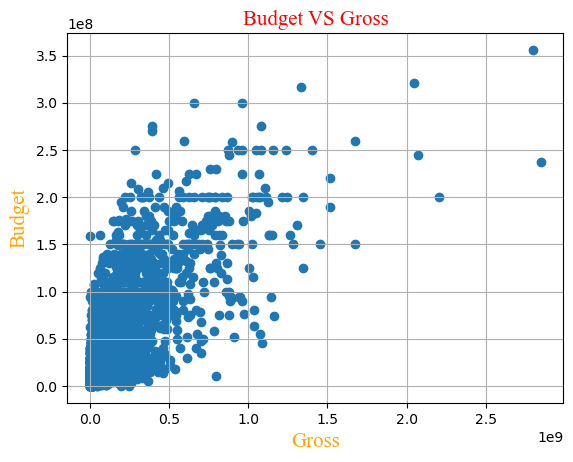

In [121]:

x= df2['gross']
y= df2['budget']
plt.scatter(x,y)
plt.grid()
plt.title("Budget VS Gross",fontdict = {'font':'Times New Roman','fontsize':15, 'color':'red'})
plt.xlabel('Gross', fontdict = {'fontname': 'Times New Roman', 'color': 'Orange', 'fontsize' : '15'})
plt.ylabel('Budget',fontdict = {'fontname': 'Times New Roman', 'color': 'Orange', 'fontsize' : '15'})

<AxesSubplot:xlabel='gross', ylabel='budget'>

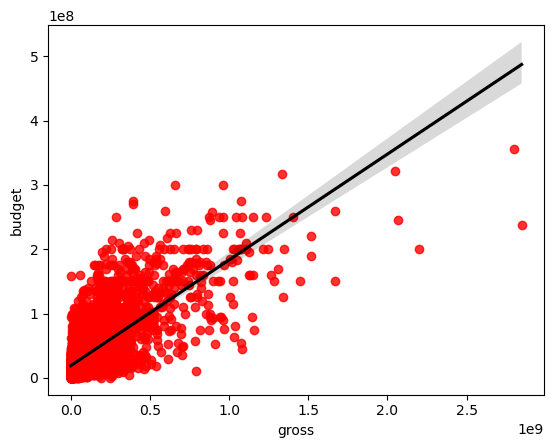

In [122]:
sns.regplot(x= 'gross', y = 'budget', data =df,scatter_kws = {'color':'red'},line_kws = {'color':'black'})


Both budget and gross seem to have a positive relation

In [123]:
#Using pearson method
df2.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(50.722222222222214, 0.5, 'Movie features')

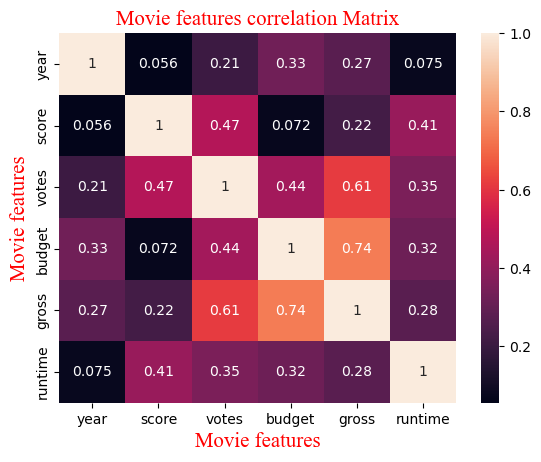

In [124]:
sns.heatmap(df2.corr(), annot = True)
plt.title('Movie features correlation Matrix',fontdict = {'font':'Times New Roman','fontsize':15, 'color':'red'})
plt.xlabel('Movie features',fontdict = {'font':'Times New Roman','fontsize':15, 'color':'red'})
plt.ylabel('Movie features',fontdict = {'font':'Times New Roman','fontsize':15, 'color':'red'})

another correlation set is votes and gross

In [125]:
df3 = df2

In [126]:
for colu in df3.columns:
    if (df3[colu].dtype == 'object'):
        df3[colu] = df3[colu].astype('category')
        df3[colu] = df3[colu].cat.codes
        
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85


Text(158.22222222222223, 0.5, 'Movie features')

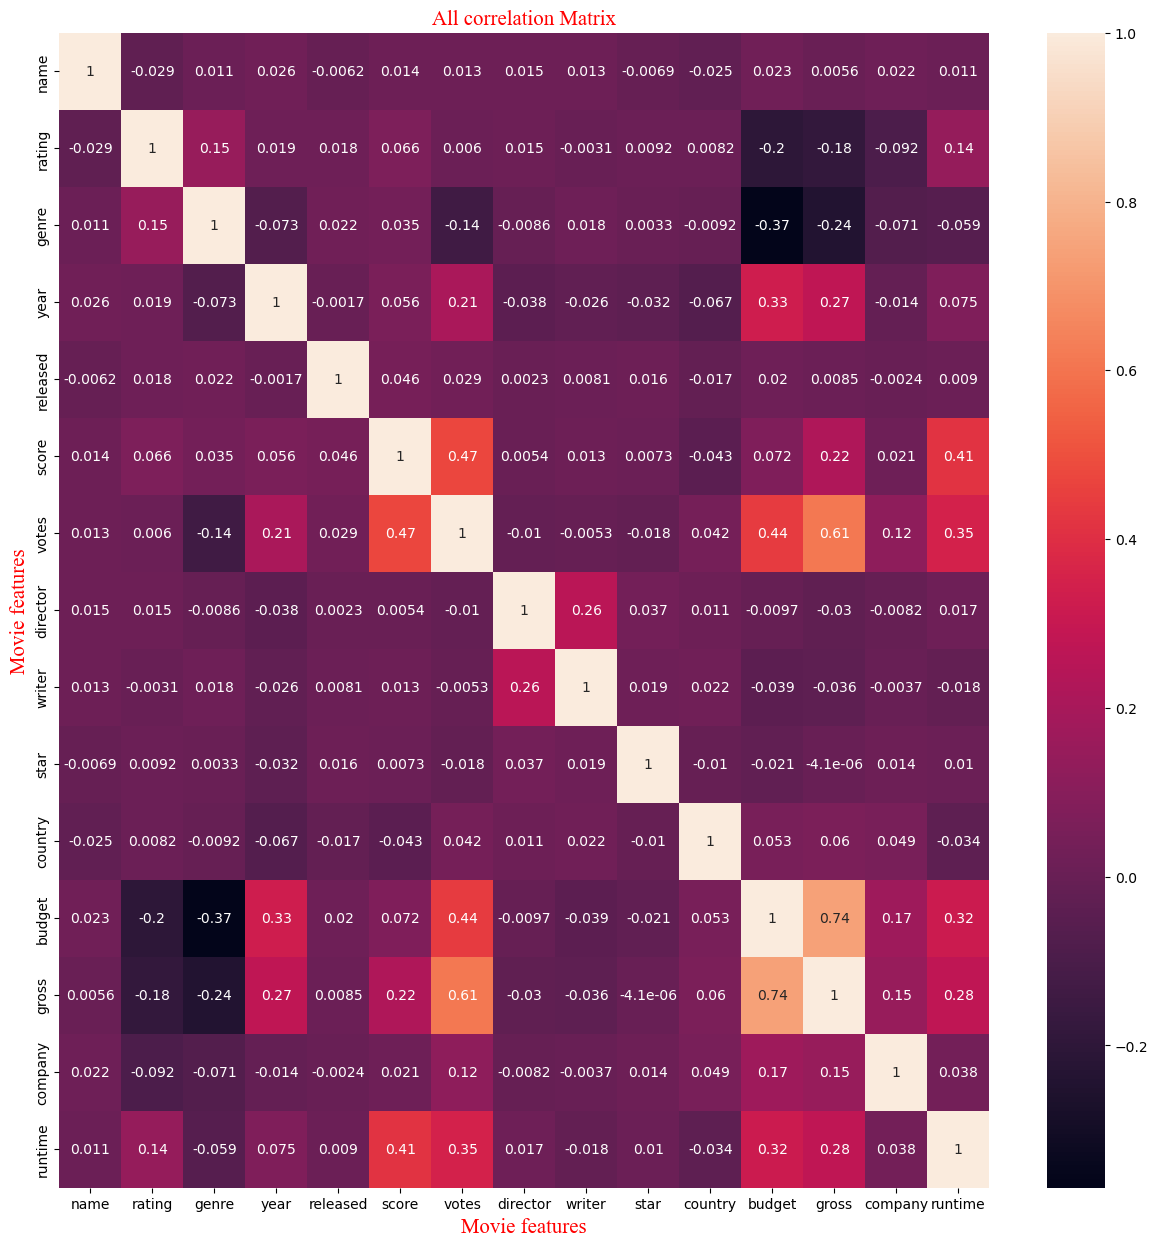

In [127]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(), annot =True)
plt.title('All correlation Matrix',fontdict = {'font':'Times New Roman','fontsize':15, 'color':'red'})
plt.xlabel('Movie features',fontdict = {'font':'Times New Roman','fontsize':15, 'color':'red'})
plt.ylabel('Movie features',fontdict = {'font':'Times New Roman','fontsize':15, 'color':'red'})

The correlations between gross- budget and gross- votes are the highest ones.

<AxesSubplot:xlabel='rating', ylabel='gross'>

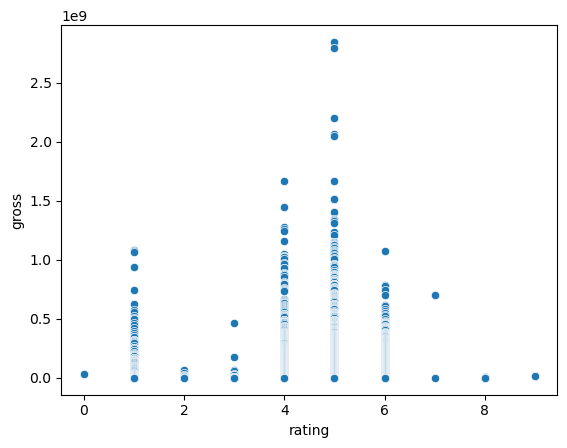

In [128]:
sns.scatterplot(x='rating',y='gross',data = df2)

In [129]:
#resetting data
df2 = df1.dropna()

In [130]:
df2['gross'] = df2['gross'].astype('int64')
df2['budget'] = df2['budget'].astype('int64')
df2['runtime'] = df2['runtime'].astype('int64')
df2['votes'] = df2['votes'].astype('int64')

In [131]:
grossearnings_sum = df2.groupby(['name','year'])['gross'].sum()
ge1 = grossearnings_sum.sort_values(ascending = False)[:15]



In [132]:
#Total earnings
ge1

name                                          year
Avatar                                        2009    2847246203
Avengers: Endgame                             2019    2797501328
Titanic                                       1997    2201647264
Star Wars: Episode VII - The Force Awakens    2015    2069521700
Avengers: Infinity War                        2018    2048359754
The Lion King                                 2019    1670727580
Jurassic World                                2015    1670516444
The Avengers                                  2012    1518815515
Furious 7                                     2015    1515341399
Frozen II                                     2019    1450026933
Avengers: Age of Ultron                       2015    1402809540
Black Panther                                 2018    1347597973
Harry Potter and the Deathly Hallows: Part 2  2011    1342321665
Star Wars: Episode VIII - The Last Jedi       2017    1332698830
Jurassic World: Fallen Kingdom         

# Q2 How much to spend to earn a good profit?

In [133]:
df2['profit'] = df2['gross'] - df2['budget']
df2['profit percentage'] = (df2['profit']/ df2['budget'])*100

In [134]:
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,profit percentage
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,27998772,147.361958
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,54353106,1207.846800
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,520375067,2890.972594
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,79953539,2284.386829
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,33846344,564.105733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,336505244,373.894716
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,234715683,276.136098
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,70487753,40.278716
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,-23894503,-17.699632


In [135]:
df2_profit = df2.loc[df2['profit'] >0]
df2_profit_1 = df2_profit.sort_values(by = ['profit'],ascending = False)
df2_profit_1.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,profit percentage
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2610246203,1101.369706
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2441501328,685.814980
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,2001647264,1000.823632
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,1824521700,744.702735
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,1727359754,538.118303


Text(0, 0.5, 'Profit (In Billions)')

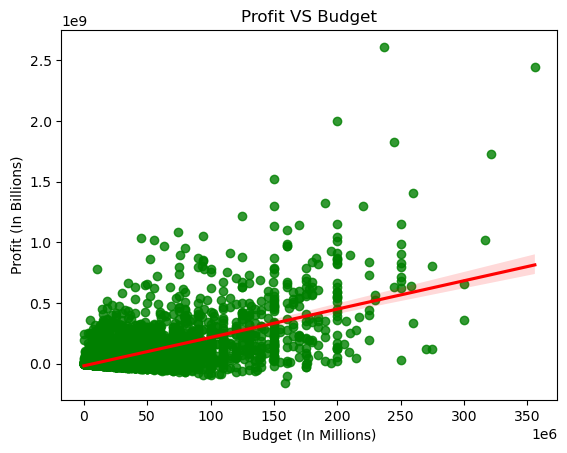

In [136]:
sns.regplot(x='budget', y = 'profit', data = df2,scatter_kws = {'color':'green'},line_kws = {'color':'red'})
plt.title('Profit VS Budget')
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xlabel('Budget (In Millions)')
plt.ylabel('Profit (In Billions)')

Profit and Budget show a positive relation

In [137]:
df2_profit_2 = df2_profit_1.sort_values(by = ['profit'],ascending = False)[:25]


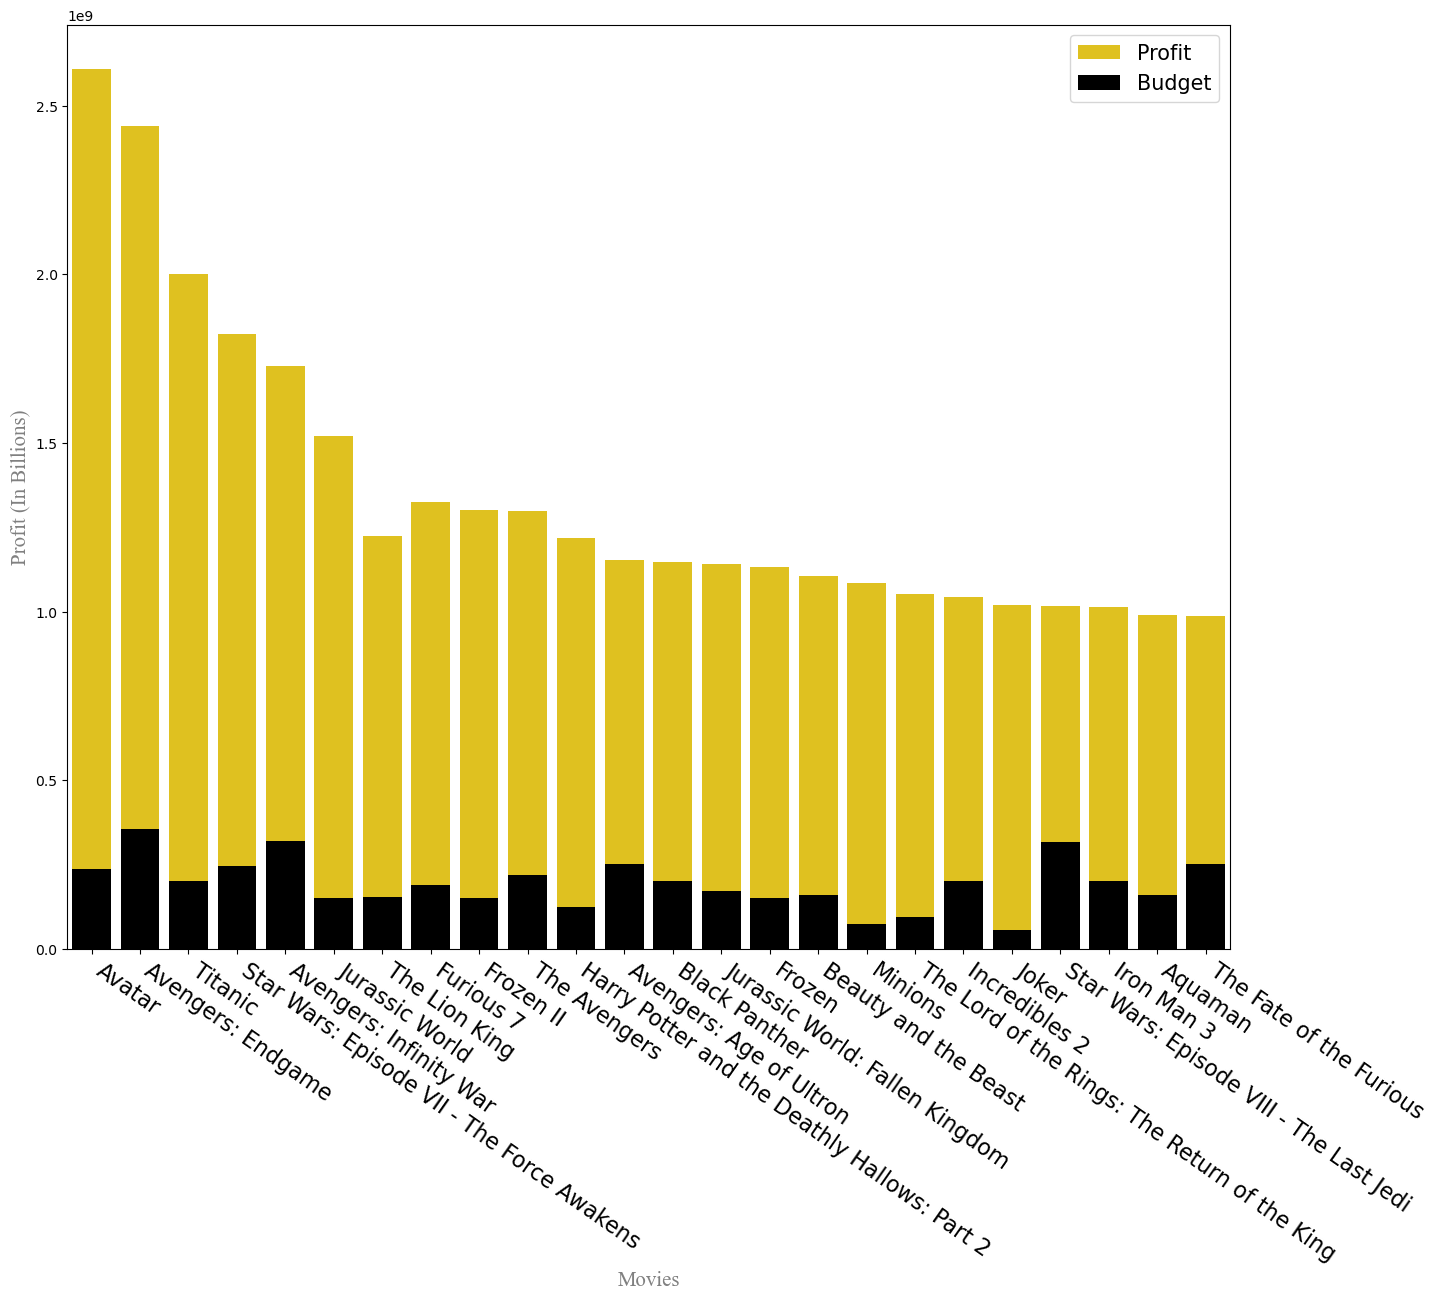

In [138]:
plt.figure(figsize=(15,12))
sns.barplot(x= 'name', y = 'profit',data = df2_profit_2, label = 'Profit', color = 'gold', ci = None)
sns.barplot(x= 'name', y = 'budget',data = df2_profit_2, label = 'Budget', color = 'black', ci = None)
plt.xlabel('Movies', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Profit (In Billions)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.xticks(rotation=-35, horizontalalignment='left', fontsize=16)
plt.legend(fontsize = 15)


In [139]:
df2['budget'].describe()

count    5.421000e+03
mean     3.600917e+07
std      4.157337e+07
min      6.000000e+03
25%      1.000000e+07
50%      2.180000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

In [140]:
df2['profit percentage'].describe()

count    5.421000e+03
mean     5.726743e+02
std      1.840971e+04
min     -9.999794e+01
25%     -2.756873e+01
50%      8.363531e+01
75%      2.667888e+02
max      1.288939e+06
Name: profit percentage, dtype: float64

In [141]:
 df2_profit_2['budget'].describe()

count    2.500000e+01
mean     1.911600e+08
std      7.973742e+07
min      4.500000e+07
25%      1.500000e+08
50%      2.000000e+08
75%      2.450000e+08
max      3.560000e+08
Name: budget, dtype: float64

In [142]:
 df2_profit_2['profit percentage'].describe()

count      25.000000
mean      840.642544
std       460.709281
min       320.409726
25%       542.587531
50%       690.271578
75%      1000.823632
max      2308.268616
Name: profit percentage, dtype: float64

<AxesSubplot:>

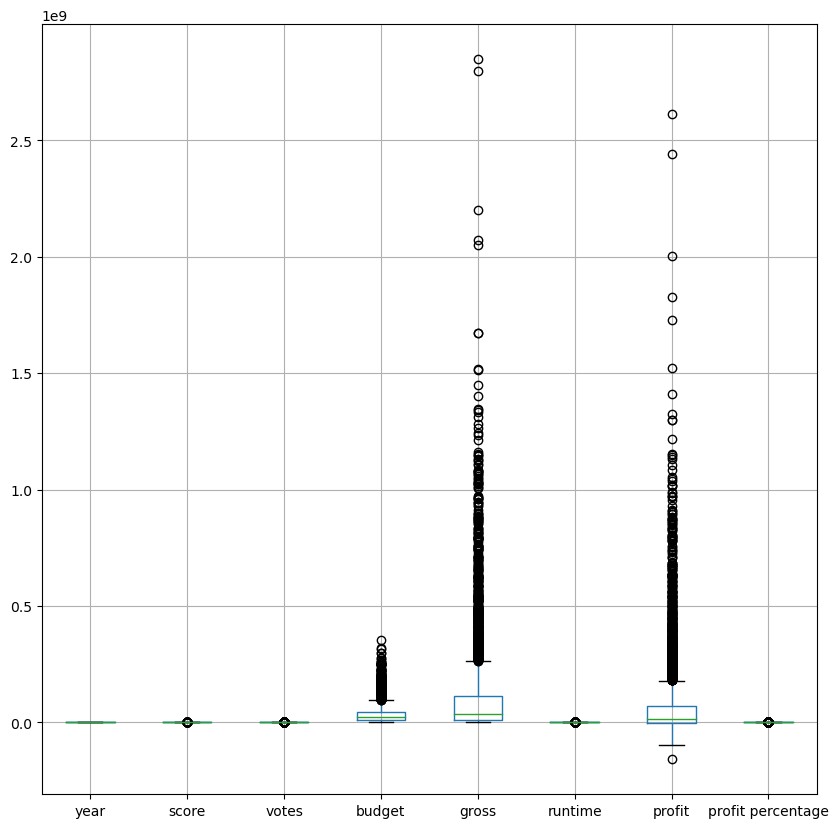

In [143]:
#presence of outliers
plt.figure(figsize=(10,10))
df2.boxplot()


In [144]:
x=  df2['budget'].median()


In [145]:
df2_big_leagues = df2.loc[(df2['profit percentage'] > 572) &  (df2['budget'] > x)]
len(df2_big_leagues)

172

In [146]:
df2_big_leagues

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,profit percentage
333,Star Wars: Episode VI - Return of the Jedi,PG,Action,1983,"May 25, 1983 (United States)",8.3,973000,Richard Marquand,Lawrence Kasdan,Mark Hamill,United States,32500000,475106177,Lucasfilm,131,442606177,1361.865160
477,Ghostbusters,PG,Action,1984,"June 8, 1984 (United States)",7.8,365000,Ivan Reitman,Dan Aykroyd,Bill Murray,United States,30000000,296187079,Columbia Pictures,105,266187079,887.290263
481,Indiana Jones and the Temple of Doom,PG,Action,1984,"May 23, 1984 (United States)",7.5,459000,Steven Spielberg,Willard Huyck,Harrison Ford,United States,28000000,333107271,Paramount Pictures,118,305107271,1089.668825
650,Rambo: First Blood Part II,R,Action,1985,"May 22, 1985 (United States)",6.5,159000,George P. Cosmatos,David Morrell,Sylvester Stallone,United States,44000000,300400432,Estudios Churubusco Azteca S.A.,96,256400432,582.728255
663,Rocky IV,PG,Drama,1985,"November 27, 1985 (United States)",6.9,192000,Sylvester Stallone,Sylvester Stallone,Sylvester Stallone,United States,30000000,300473716,United Artists,91,270473716,901.579053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,Spider-Man: Far from Home,PG-13,Action,2019,"July 2, 2019 (United States)",7.5,359000,Jon Watts,Chris McKenna,Tom Holland,United States,160000000,1131927996,Columbia Pictures,129,971927996,607.454997
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,1300026933,866.684622
7503,Annabelle Comes Home,R,Horror,2019,"June 26, 2019 (United States)",5.9,65000,Gary Dauberman,Gary Dauberman,Vera Farmiga,United States,30000000,231252591,New Line Cinema,106,201252591,670.841970
7506,The Addams Family,PG,Animation,2019,"October 11, 2019 (United States)",5.8,31000,Greg Tiernan,Matt Lieberman,Oscar Isaac,Canada,24000000,203783566,Metro-Goldwyn-Mayer (MGM),86,179783566,749.098192


Text(0, 0.5, 'Profit percentage')

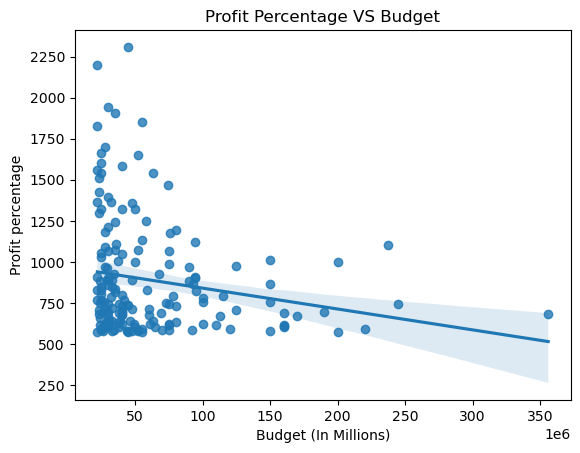

In [147]:
sns.regplot(x= 'budget', y = 'profit percentage' , data = df2_big_leagues)
plt.title('Profit Percentage VS Budget')
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xlabel('Budget (In Millions)')
plt.ylabel('Profit percentage')

 Conclusion - we'll go with the median as the mean is skewed due to the presence of outliers. I would recommend to spend over the median amount that is 21800000 dollars, as the profit percentage remains more than 572 % safely well above the median budget, but pushing the budget will give us diminished returns. 
